__This notebook is used to model the semantic trajectory of selected words over time by creating vector representations of TED speakers' vocabulary using Gensim word2vec.__

__The target word for this example is "future".__

__Other target words used for this project included "climate", "equality", "technology", "change", "idea", "dream", "design".__

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/project_submissions/ted_talks/TED_Talks_word2vec.ipynb#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/project_submissions/ted_talks/TED_Talks_word2vec.ipynb#Library-Imports" data-toc-modified-id="Library-Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href="http://localhost:8888/notebooks/project_submissions/ted_talks/TED_Talks_word2vec.ipynb#Data-Imports" data-toc-modified-id="Data-Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Imports</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/project_submissions/ted_talks/TED_Talks_word2vec.ipynb#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="http://localhost:8888/notebooks/project_submissions/ted_talks/TED_Talks_word2vec.ipynb#Word2Vec" data-toc-modified-id="Word2Vec-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word2Vec</a></span></li><li><span><a href="http://localhost:8888/notebooks/project_submissions/ted_talks/TED_Talks_word2vec.ipynb#t-SNE-Visualization" data-toc-modified-id="t-SNE-Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>t-SNE Visualization</a></span></li></ul></div>

# Imports

## Library Imports

In [48]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
from nltk.tokenize import wordpunct_tokenize
import gensim
from sklearn.manifold import TSNE

In [2]:
pd.set_option('display.max_columns', None)

## Data Imports

In [29]:
df = pd.read_pickle('df.pkl')

In [88]:
# df.head()

# Data Preprocessing

In [31]:
df['year'] = df['filmed_date'].dt.year

__Process text for use with Gensim Word2Vec.__

In [36]:
df.drop(['words','removed_stopwords', 'removed_punc', 'recompiled', 'stemmed_words',
         'recompiled_stemmed'], axis=1, inplace=True)

In [37]:
def make_words(sentences):
    words = []
    for sentence in sentences:
        words.append(wordpunct_tokenize(sentence))
    return words

def remove_stopwords(lists_of_words):
    stopwords = nltk.corpus.stopwords.words('english')
    new_list = []
    for l in lists_of_words:
        new_list.append([w for w in l if w not in stopwords])
    return new_list

def remove_punctuation(list_of_words):
    punctuation = ['.', ',', '?', '!', '-', '–', "'", '"', '(', ')', ':', ';', '?"', '!"', '."', ',"']
    new_list = []
    for l in list_of_words:
        new_list.append([w for w in l if w.isalpha()])
    return new_list

def remove_empty(lists):
    return [l for l in lists if l != []]

In [38]:
df['words'] = df['sentences'].map(make_words)
df['removed_stopwords'] = df['words'].map(remove_stopwords)
df['removed_punc'] = df['removed_stopwords'].map(remove_punctuation)
df['w2v_input'] = df['removed_punc'].map(remove_empty)

__Tag the target word "future" with a numerical identifier in order to identify words as they are used over time.__

In [39]:
df2008 = df[df['year'] <= 2008]
df200910 = df[(df['year'] == 2009) |(df['year'] == 2010)]
df201112 = df[(df['year'] == 2011) |(df['year'] == 2012)]
df201314 = df[(df['year'] == 2013) |(df['year'] == 2014)]
df201516 = df[(df['year'] == 2015) |(df['year'] == 2016)]
df2017 = df[df['year'] == 2017]

In [40]:
target = 'future'

def replace_2008(sentences):
    new_sentences = []
    for sent in sentences:
        new_sent = []
        for word in sent:
            if word == target:
                new_sent.append(target+'2008')
            else:
                new_sent.append(word)
        new_sentences.append(new_sent)
    return new_sentences

def replace_200910(sentences):
    new_sentences = []
    for sent in sentences:
        new_sent = []
        for word in sent:
            if word == target:
                new_sent.append(target+'2010')
            else:
                new_sent.append(word)
        new_sentences.append(new_sent)
    return new_sentences

def replace_201112(sentences):
    new_sentences = []
    for sent in sentences:
        new_sent = []
        for word in sent:
            if word == target:
                new_sent.append(target+'2012')
            else:
                new_sent.append(word)
        new_sentences.append(new_sent)
    return new_sentences

def replace_201314(sentences):
    new_sentences = []
    for sent in sentences:
        new_sent = []
        for word in sent:
            if word == target:
                new_sent.append(target+'2014')
            else:
                new_sent.append(word)
        new_sentences.append(new_sent)
    return new_sentences

def replace_201516(sentences):
    new_sentences = []
    for sent in sentences:
        new_sent = []
        for word in sent:
            if word == target:
                new_sent.append(target+'2016')
            else:
                new_sent.append(word)
        new_sentences.append(new_sent)
    return new_sentences

def replace_2017(sentences):
    new_sentences = []
    for sent in sentences:
        new_sent = []
        for word in sent:
            if word == target:
                new_sent.append(target+'2017')
            else:
                new_sent.append(word)
        new_sentences.append(new_sent)
    return new_sentences

In [41]:
df2008['w2v'] = df2008['w2v_input'].map(replace_2008)
df200910['w2v'] = df200910['w2v_input'].map(replace_200910)
df201112['w2v'] = df201112['w2v_input'].map(replace_201112)
df201314['w2v'] = df201314['w2v_input'].map(replace_201314)
df201516['w2v'] = df201516['w2v_input'].map(replace_201516)
df2017['w2v'] = df2017['w2v_input'].map(replace_2017)

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

__Concatenate year-based dataframes back into one dataframe.__

In [42]:
df2 = pd.concat([df2008, df200910, df201112, df201314, df201516, df2017])

In [89]:
# df2.w2v.values

In [45]:
def create_w2v_input(lists):
    new_input = []
    for l in lists[:200]:
        new_input.extend(l)
    for l in lists[200:400]:
        new_input.extend(l)
    for l in lists[400:600]:
        new_input.extend(l)
    for l in lists[600:800]:
        new_input.extend(l)
    for l in lists[800:1000]:
        new_input.extend(l)
    for l in lists[1000:1200]:
        new_input.extend(l)
    for l in lists[1200:1400]:
        new_input.extend(l)
    for l in lists[1400:1600]:
        new_input.extend(l)
    for l in lists[1600:1800]:
        new_input.extend(l)
    for l in lists[1800:2000]:
        new_input.extend(l)
    for l in lists[2000:2200]:
        new_input.extend(l)
    for l in lists[2200:2400]:
        new_input.extend(l)
    for l in lists[2400:2468]:
        new_input.extend(l)    
    return new_input

In [46]:
w2v_input = create_w2v_input(df2.w2v.values)

# Word2Vec

In [47]:
ted2vec = gensim.models.Word2Vec(
    w2v_input, 
    size=100, 
    window=5, 
    min_count=1,
    workers=2,
    sg=1,
    seed=1
)

In [50]:
ted2vec.most_similar('future2017', topn=20)

[('future2012', 0.8621129393577576),
 ('imaginations', 0.8576896786689758),
 ('future2010', 0.8533451557159424),
 ('future2016', 0.8489586114883423),
 ('futures', 0.8456023335456848),
 ('rediscover', 0.8403458595275879),
 ('hopeful', 0.8340294361114502),
 ('future2014', 0.831763505935669),
 ('cherish', 0.8279818296432495),
 ('backward', 0.8229305148124695),
 ('imagining', 0.8196289539337158),
 ('prospect', 0.8164249658584595),
 ('wiser', 0.815784215927124),
 ('journeys', 0.8157401084899902),
 ('rationally', 0.8149835467338562),
 ('jd', 0.814212441444397),
 ('dwell', 0.8138578534126282),
 ('inviting', 0.8129650950431824),
 ('broaden', 0.8123300075531006),
 ('colonize', 0.8120243549346924)]

In [81]:
def get_vectors(model, words):
    vectors = defaultdict()
    for word in words:
        vectors[word] = model[word].tolist()
        similar_words = model.most_similar(word, topn=18)
        for sim in similar_words:
            w = sim[0]
            vectors[w] = model[w].tolist()
    return vectors

In [82]:
target = 'future'
vectors_dict = get_vectors(ted2vec, [target+'2008', target+'2010', target+'2012', target+'2014', target+'2016', target+'2017'])

In [83]:
len(vectors_dict)

46

In [84]:
vectors_dict.keys()

dict_keys(['future2008', 'future2016', 'future2014', 'future2012', 'future2010', 'future2017', 'envision', 'lastly', 'imaginations', 'hopefully', 'pioneering', 'inspire', 'rediscover', 'futures', 'someday', 'fulfill', 'geniuses', 'inspires', 'leapfrog', 'backward', 'humane', 'succeeding', 'cultivate', 'wiser', 'aspiration', 'civilized', 'norm', 'equitable', 'reimagine', 'rationally', 'hopeful', 'optimistic', 'anticipate', 'aiming', 'jd', 'encourages', 'imagining', 'curate', 'inviting', 'aspirations', 'pursuing', 'fragility', 'cherish', 'prospect', 'journeys', 'dwell'])

In [85]:
vectors = list(vectors_dict.values())

# t-SNE Visualization

In [86]:
tsne_model = TSNE(n_components=2, random_state=0)
results = tsne_model.fit_transform(vectors) 

''

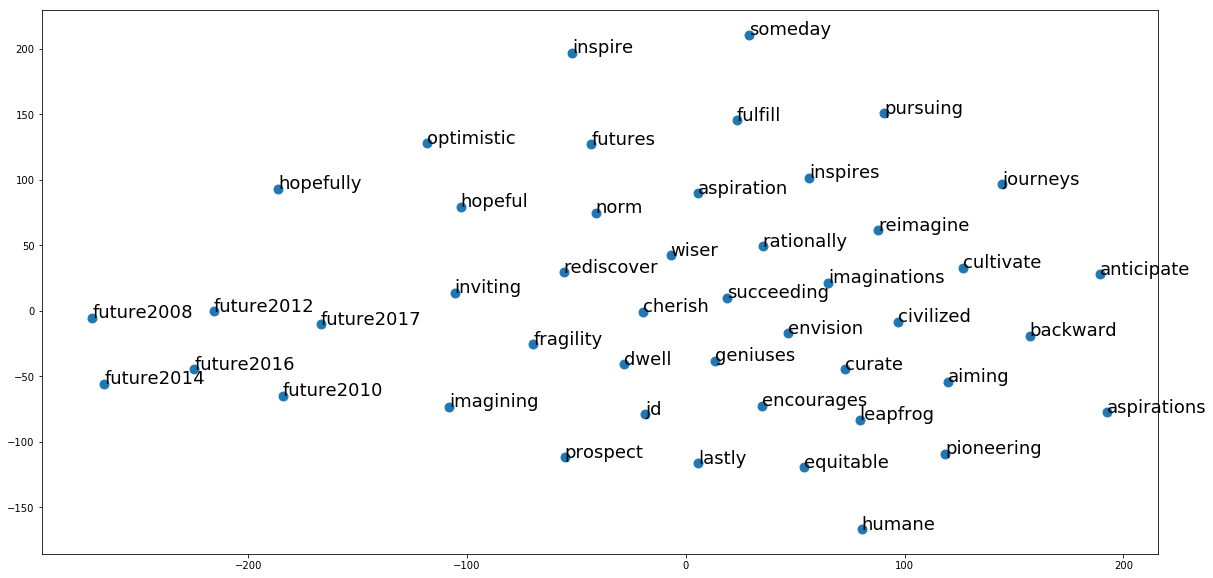

In [87]:
plt.figure(figsize=(20, 10))
plt.scatter(results[:, 0], results[:, 1], s=80)
words = list(vectors_dict.keys())
for i, word in enumerate(words):
    plt.annotate(word, xy=(results[i, 0], results[i, 1]), fontsize=18)
;